<a href="https://colab.research.google.com/github/aelshehawy/PythonSocialDataScience/blob/main/Session_6_Python_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**This session:**


- Data Collection through Twitter API
- Mini Natural Language Processing Introduction
- Mini Introduction to Supervised and Unsupverised Machine Learning Algorithms


# 🐦 ***Twitter Mini Session***

**Lets get started**

1. Register your application
https://developer.twitter.com/en/docs/twitter-api/getting-started/about-twitter-api

2. Save you applications Consumer Key and Consumer Secret from the application details tab.


**More detailed instruction**

1. Have a Twitter Account

2. Apply for for a developer account and describe your intended use

3. Review your access application and read TOS

5. Set up and application

6. Copy your tokens

Get your needed authentication
https://developer.twitter.com/en

API Limits
https://developer.twitter.com/en/docs/basics/rate-limits &
https://developer.twitter.com/en/docs/twitter-api/getting-started/about-twitter-api



## Twython API to access Twitter Data

https://twython.readthedocs.io/en/latest/

Query data for:
- User information
- Twitter lists
- Timelines

and anything found in the Twitter API docs.

In [ ]:
#install twython

!pip install twython

In [ ]:
#using an API
# to install the library:
# pip install twython

# how to find the documentation, just google name of the library + documentation
# this is the twithon documentation: https://twython.readthedocs.io/en/latest/

from twython import Twython

# please change it 

twitter_api = Twython() #add your own keys here



In [ ]:
#you can then post on your own timeline from within Python
#twitter_api.update_status(status="Hello world. We are live from the Python class")

## Lets search for a certain user

**Here we will try an example that fetches popular tweets that mention Boris Johnson's account**

If you want to learn more about standard search operators, you will find information here
https://developer.twitter.com/en/docs/twitter-api/v1/rules-and-filtering/search-operators

In [ ]:
# here you search - to get them ordered by time, change popular with recent

#another example
#search2 = twitter_api.search(q='#trump',count=100,result_type='recent')

search = twitter_api.search(q='@elonmusk', count=10, result_type='popular')

In [ ]:
search

In [ ]:
##import json
#with open('search1.json', 'w') as fp:
    #json.dump(search, fp)


#import json
#json1_file = open('search1.json')
#json1_str = json1_file.read()
#json1_data = json.loads(json1_str)


In [ ]:
#what object do we receive back? #read documentation or use:

print (type(search))

In [ ]:
# which keys do we have in the dictionary?

print (search.keys())

In [ ]:
# which object do we have into "statuses"?

print (type(search["statuses"]))

In [ ]:
# we create a new variable, called "tweets" and we put the content of "search["statuses"]" there 

tweets = search['statuses']

for tweet in tweets:
    # each tweet is again a dictionary
    print (type(tweet))
    
    # use this to get the keys
    print (tweet.keys())
    
    # use this to print the content
    print (tweet["text"])

    #use break to stop the for loop
    break

In [ ]:
# we can get the text out!

tweets_text = []

for tweet in tweets:
    text = tweet["text"]
    
    # add tweets to list
    tweets_text.append(text)
print (tweets_text)



## Hashtags

In [ ]:

#here we use the twitter api to search for the most recent 100 tweets that use #russia
search2 = twitter_api.search(q='#russia',count=100,result_type='recent')

#i extract the statuses of those tweets that use the hashtag russia and save them, statuses would include the text that I need
tweets = search2['statuses']

In [ ]:
#search2 
#check the dictionary structure if needed
tweets

In [ ]:
#here I want to extract the text from each of the statuses

tweets_text = []
#for each tweet in the tweets that I have saved
for tweet in tweets:
  #extract the text
    text = tweet["text"]
    
    # add tweets to list
    tweets_text.append(text)

    #print my tweets
print (tweets_text)



Extract all hashtags from the tweet text

In [ ]:
hashtags = []
#for each tweet in the text
for tweet in tweets_text:
  #split the tweets by white space
    tweet = tweet.split(" ")
    #for each word in the tweet
    for word in tweet:
      #if it contains a hashtgag
        if "#" in word:
          #save it in my list of hashtags
            hashtags.append(word)
            

In [ ]:
hashtags

In [ ]:
#the counter library is a very important and powerful library
#it helps us simply count stuff


from collections import Counter
hashtags_to_count = (word for word in hashtags)
c = Counter(hashtags_to_count)


In [ ]:
print (c.most_common(20))

In [ ]:
import pandas
df = pandas.DataFrame.from_dict(c, orient='index')
df

In [ ]:

df.plot(kind='bar', figsize=(20, 10))

# Basics of NLP on Tweets

In [ ]:
tweets

In [ ]:
#or load with data in week 5 folder
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Python for Social Data Science/Session 6/tweets_session5.txt', sep="\t", header=None)
df

In [ ]:
df=pd.melt(df)
df = df.drop('variable', axis=1)
df = df.rename(columns={'value': 'col'})
df = df.iloc[1:]
df.head()

1. Lets clean our text - Pre-Processing

In [ ]:
#turn to pandas from tweets text above
df = pd.DataFrame({'col':tweets_text})
df.head()



In [ ]:
#NLP pipeline

import string
exclude = set(string.punctuation) # if you see this not part of the punctuation -->”
import nltk
nltk.download('stopwords') #you can also download all libraries in nltk at once
from nltk.corpus import stopwords
stop_word_list = stopwords.words('german')
nltk.download('punkt')


def nlp_simple_pipeline(text):
    
    #it depends if the words have been lowercased or not
    text = text.lower()
    text=text.split()
    text = [token for token in text if token not in exclude and token.isalpha()]
    text = [token for token in text if token not in stop_word_list]

    return text

In [ ]:
#use nlp pipeline
df["col"]=df["col"].apply(nlp_simple_pipeline) 
df

In [ ]:
df['text'] =df['col'].apply(lambda x: ' '.join(x))
df

## Word Clouds

In [ ]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(df['text'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [ ]:
import nltk
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

## Pos-Tagging

In [ ]:
df['tagged'] = df['col'].apply(nltk.pos_tag)
df[['tagged']].head()


extract nouns

In [ ]:
df['nouns'] = df['tagged'].apply(lambda x: [word for word, tag in x if tag in ['NN', 'NNS', 'NNP', 'NNPS']])
df

## Named Entity Recognition

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')


In [ ]:
df

In [ ]:
doc = nlp(df['text'][9])


In [ ]:
doc

In [ ]:
print("Text is: "+doc.text+"\n")
for token in doc:
    print(token.text+"\t"+token.pos_+"\t"+token.ent_type_)

## Simple Sentiment Analysis

We are going to try out a dictionary based sentiment analysis today!

Using Afinn, read more here: http://www2.imm.dtu.dk/pubdb/edoc/imm6006.pdf & https://darenr.github.io/afinn/

Afinn is a wordlist-based approach for sentiment analysis.

The AFINN lexicon assigns words with a score that runs between -5 and 5, with negative scores indicating negative sentiment and positive scores indicating positive sentiment.

In [ ]:
!pip install afinn 


In [ ]:
df

In [ ]:
df2=df[0:10]

In [ ]:
#instantiate afinn
from afinn import Afinn
def afinn_polarity(text):
    return Afinn().score(text)
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
df2['polarity'] = df2["text"].apply(afinn_polarity)
df2['classification'] = df2['polarity'].apply(getAnalysis)

In [ ]:
df2

is the result different just restricting to nouns?

In [ ]:
df2['nouns_full'] =df2['nouns'].apply(lambda x: ' '.join(x))
df2['polarity2'] = df2["nouns_full"].apply(afinn_polarity)
df2['classification2'] = df2['polarity2'].apply(getAnalysis)

df2.head()

# Data Exploration using Unsupervised Machine Learning

## Load data

In [ ]:
#pandas 

import pandas as pd
wine_reviews = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Oxford Text Analysis 22/Python QTA Drive Oxford 2022/Data/winemag-data-130k-v2.csv")



In [ ]:
wine_reviews.head()


## Visualization

In [ ]:
#scatterplot price - points

wine_reviews[wine_reviews['price'] < 100].sample(100).plot.scatter(x='price', y='points')


In [ ]:
#barplot

import csv
import numpy
import pandas
import matplotlib.pyplot as plt

%pylab inline

wine_reviews['country'].value_counts()[:10].plot(kind='bar',figsize=(12,8));
plt.xticks(rotation=45)
plt.xlabel('country')
plt.ylabel('Number of country count')
plt.show()


In [ ]:
wine_reviews.head()

## Topic Modelling

### Instead of assigning each document to a single cluster
### The goal is to identify the underlying topics of each document and group them consequently.

- In k-means clustering, each observation—for our purposes, each document—can be assigned to one, and only one, cluster. 
- Topic models, however, are mixture models. This means that each document is assigned a probability of belonging to a latent theme or “topic.” 



(Chris Bail’s Duke SICC)



### What are these topics?

- Groups of tokens that are likely to appear in the same context 
- Topics explain co-occurrences of words in documents with sets of semantically related words, called topics. 
- A hidden structure that determines how tokens appear in the corpus

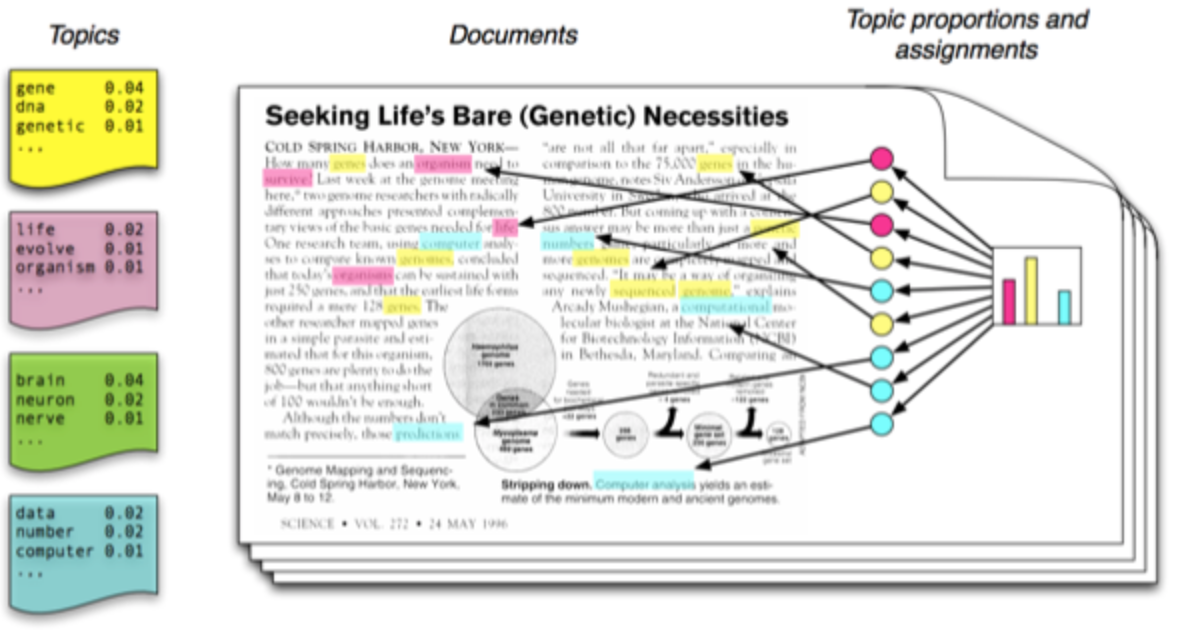

## **What is SpaCy?**

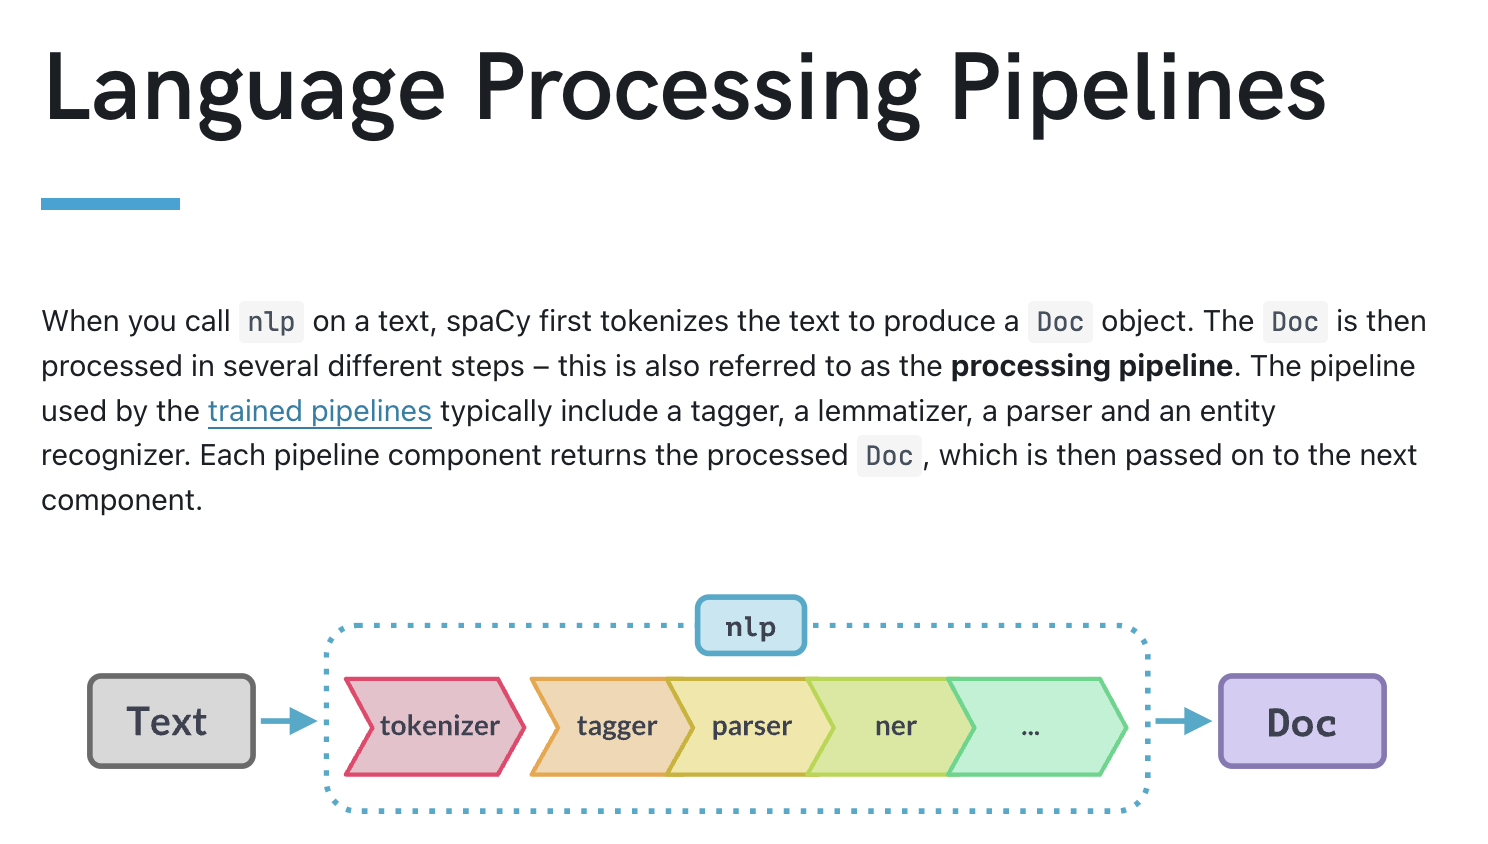

In [ ]:
!pip install pyLDAvis -qq
!pip install -qq -U gensim
!pip install spacy -qq
!pip install matplotlib -qq
!pip install seaborn -qq
!python -m spacy download en_core_web_md -qq
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import spacy
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()# Visualise inside a notebook
import en_core_web_md
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaMulticore
from gensim.models import CoherenceModel
# Our spaCy model:
nlp = en_core_web_md.load()
# Tags I want to remove from the text
removal= ['ADV','PRON','CCONJ','PUNCT','PART','DET','ADP','SPACE', 'NUM', 'SYM']


In [ ]:
wine_reviews2=wine_reviews[0:40]
wine_reviews2

In [ ]:
tokens = []
for summary in nlp.pipe(wine_reviews2['description']):
   proj_tok = [token.lemma_.lower() for token in summary if token.pos_ not in removal and not token.is_stop and token.is_alpha]
   tokens.append(proj_tok)

In [ ]:
wine_reviews2['tokens'] = tokens
wine_reviews2['tokens']

In [ ]:
dictionary = Dictionary(wine_reviews2['tokens'])


In [ ]:
print(dictionary.token2id)


In [ ]:
corpus = [dictionary.doc2bow(doc) for doc in wine_reviews2['tokens']]


In [ ]:
#build the model
lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=50, num_topics=5)

In [ ]:
lda_model.print_topics()


In [ ]:
lda_display = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_display)

# Your Turn!

Check the Amazon Alexa reviews

- if you are tasked to understand these reviews and provide a useful report for Amazon, what would you do?

Credits to: Tarek Ghanoum (Topic Modelling in Python with spaCy and Gensim) Medium Article. Dec 20, 2021

